In [2]:
# importing numpy libray
import numpy as np

Linear Regression

In [3]:
class Linear_Regression:

    def __init__(self, learning_rate, no_of_iterations ): 
    
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        
        
    def fit(self, X, Y):
    
        # number of training examples and number of features
        
        self.m, self.n = X.shape #number of rows and columns
        
        # initiating the weight and bias
        
        self.w =np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y
        
        # implementing gradient descent
    
        for i in range(self.no_of_iterations):
            self.update_weights()
    
    def update_weights(self, ):
        Y_prediction = self.predict(self.X)
        
        # calculate gradients
        
        dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m
        
        db = -2 * np.sum(self.Y -Y_prediction)/self.m
        
        # updating the weights
        
        self.w = self.w - self.learning_rate*dw
        self.b = self.b - self.learning_rate*db

        
    def predict(self, X):
        return X.dot(self.w) + self.b
        

Using Linear regression model for prediction

In [4]:
# importing neccessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Data Pre-Preprocessing

In [5]:
# loading the data from csv file to a pandas dataframe
salary_data = pd.read_csv(r"C:\Users\BRIGHT COMPUTERS\Desktop\machine learning projects\building_and_implementing_linear_regression\salary_data.csv")

In [6]:
# printing the first five columns of the data frame
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [7]:
salary_data.tail() # print last five rows of the dataframe

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [8]:
# print the number of rows and columns in the dataframe
salary_data.shape

(30, 2)

In [9]:
# checking for missing values
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64




Splitting the features and target variables

In [10]:
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

In [11]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [12]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


splitting the dataset into training and testing data

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state = 2)


Training the Linear regression model

In [23]:
model = Linear_Regression(learning_rate = 0.02, no_of_iterations=100)

In [24]:
model.fit(X_train, Y_train)

In [25]:
# printing the parameter values (weights and bias)

print('weight = ', model.w[0])
print('bias = ', model.b)

weight =  10941.258155090314
bias =  13499.045037502532


Predict the salary value for the test

In [26]:
test_data_prediction = model.predict(X_test)

In [27]:
print(test_data_prediction)

[ 27722.68063912  25534.4290081   62734.70673541  53981.70021134
  91181.97793864  79146.59396804 103217.36190924  46322.81950277
  35381.56134768  87899.60049212]


visualizing the predicted values and actual values

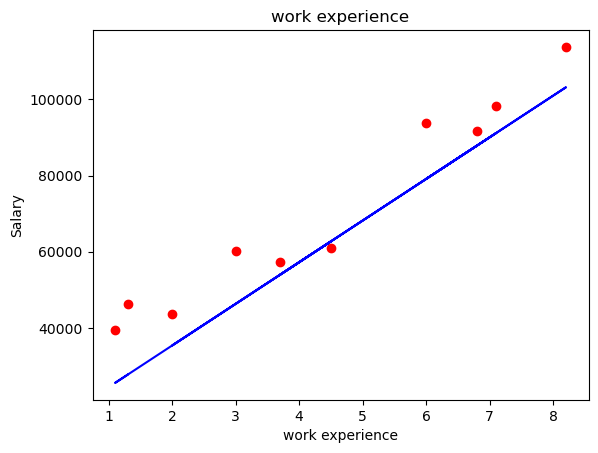

In [28]:
plt.scatter(X_test, Y_test, color='red')
plt.plot(X_test, test_data_prediction, color='blue')
plt.xlabel('work experience')
plt.ylabel('Salary')
plt.title('work experience')
plt.show()